In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
weather_data = pd.read_csv('ashrae-energy-prediction/weather_train.csv')
# weather_data = #convert timestamp to number.
# weather_data["day"] = weather_data["timestamp"].str[5:7]
weather_data["day"] = (weather_data["timestamp"].str[5:7].astype(int)-1)*30+weather_data["timestamp"].str[8:11].astype(int)
weather_data["time"] = weather_data["timestamp"].str[10:13].astype(int)

In [35]:
def run_prediction(data, site, feature, model, name, output):
    
    data = data.loc[data['site_id'] == site,["day","time",feature]]
    data = data.dropna()
    if (len(data.index) ==0):
        return 0
    
    devel = data.sample(frac = 0.30)
    train = data.drop(devel.index)
        
    X_train = train.loc[:,["day","time"]]
    y_train = train.loc[:,feature].to_numpy()#.reshape(-1,1)
    X_devel = devel.loc[:,["day","time"]]
    y_devel = devel.loc[:,feature].to_numpy()#.reshape(-1,1)
    
    poly = PolynomialFeatures(5)
    prepolytrain = X_train
    X_train = poly.fit_transform(X_train)
    X_devel = poly.transform(X_devel)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_devel)
    
    if(output):
#         print(poly.get_feature_names(prepolytrain.columns))
        
        MAE = mean_absolute_error(y_devel, y_pred)
        ARE = MAE/118.1*100
        RMSE = mean_squared_error(y_devel, y_pred, squared = False)
        R2 = r2_score(y_devel, y_pred)
        print("Mean absolute error: %.2f" % MAE)
#         print("Average relative error: %.2f" % ARE+"%")
        print("R^2 score: %.4f" % R2)

        #344 and 6

        fig1, ax1 = plt.subplots()
        ax1.set_title(" ".join([feature,"MAE:",str(MAE)[:5],"RMSE:",str(RMSE)[:5],"R^2",str(R2)[:5]]))
        ax1.set_xlabel("Day")
        ax1.set_ylabel(feature)
#         ax1.scatter(X_devel[:15,1],y_devel[:15])
#         ax1.scatter(X_devel[:15,1],y_pred[:15])
        ax1.scatter(X_devel[:,1],y_devel[:])
        ax1.scatter(X_devel[:,1],y_pred[:])
        
#         fig2, ax2 = plt.subplots()
#         ax1.set_title("")
#         ax2.set_xlabel("Time")
#         ax2.set_ylabel(feature)
#         ax2.scatter(X_devel[:15,2],y_devel[:15])
#         ax2.scatter(X_devel[:15,2],y_pred[:15]) 

    return r2_score(y_devel, y_pred)
    #return [model, r2_score(y_devel, y_pred)]

In [14]:
#there are 15 sites... so for each site, we make a model for each weather feature
sites = range(0,16)
scores = np.zeros((16,7))
for site in sites:
    for feature_num, feature in enumerate(list(weather_data)[2:9]):
#         print(feature)
#         model[site_num][feature] = run_predictions(...)[0] #model is a 2d dict
        scores[site][feature_num] = run_prediction(weather_data, site, feature, linear_model.LinearRegression(),"Linear Regression", False)

In [15]:
scores=pd.DataFrame(scores, columns=[list(weather_data)[2:9]]) 
scores.head(16)
#below, we see the R2 scores for each weather feature, for each site. 
#As you can see, only air_tempurature is doing statistically well.
#However, that doesn't necessarily mean theyre bad... looking at the relative error (next code block) 
#shows that we get good predictions for everything except for wind_direction. 

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.753795,0.108780,0.541522,0.010701,0.179123,0.039737,0.221658
1,0.772458,-0.018887,0.576075,0.000000,0.213900,0.031312,0.159246
2,0.856475,0.073691,0.551325,-0.000676,0.557384,0.207896,0.117190
3,0.830893,0.080545,0.721311,-0.000669,0.082491,0.022794,0.071877
4,0.698298,0.114819,0.454176,0.010853,0.267433,0.304005,0.306475
5,0.739176,0.075776,0.634361,0.000000,0.000000,0.071995,0.075896
6,0.785037,0.013559,0.726718,-0.011493,0.095034,0.053665,0.186163
7,0.837178,0.000000,0.740693,0.089292,0.034966,0.006274,0.113028
8,0.766225,0.135438,0.553409,0.014247,0.181295,0.036853,0.230461
9,0.761560,0.079735,0.640373,0.000174,0.250375,0.056930,0.144909



air_temperature: 
Mean absolute error: 2.24
R^2 score: 0.7445

cloud_coverage: 
Mean absolute error: 1.56
R^2 score: 0.1439

dew_temperature: 
Mean absolute error: 3.25
R^2 score: 0.5178

precip_depth_1_hr: 
Mean absolute error: 2.64
R^2 score: 0.0059

sea_level_pressure: 
Mean absolute error: 2.84
R^2 score: 0.1584

wind_direction: 
Mean absolute error: 98.84
R^2 score: 0.0518

wind_speed: 
Mean absolute error: 1.42
R^2 score: 0.2246


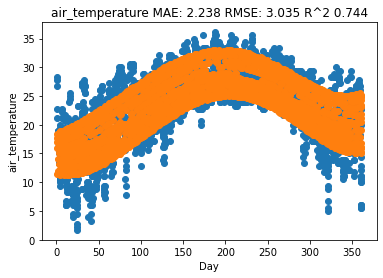

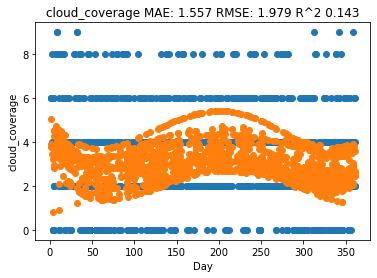

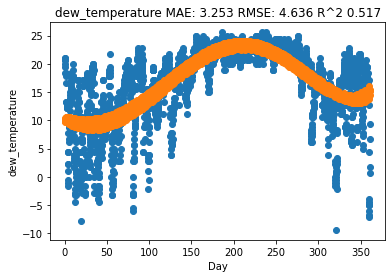

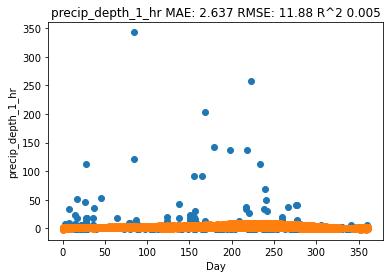

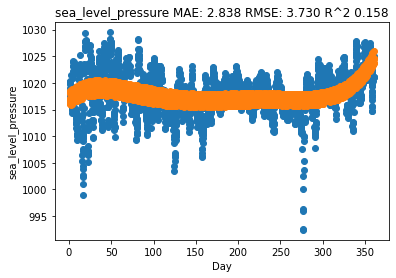

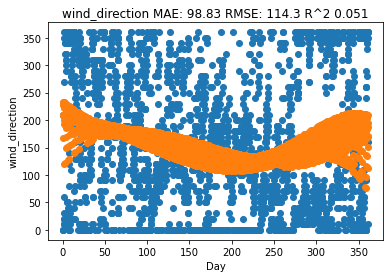

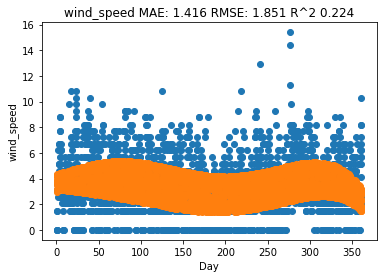

In [36]:
#here's more details and plots for each weather feature, only showing models for site 0 (as an example)
for feature_num, feature in enumerate(list(weather_data)[2:9]):
    print("\n"+feature+": ")
    run_prediction(weather_data, 0, feature, linear_model.LinearRegression(),"Linear Regression", True)
#     run_prediction(weather_data, 0, feature, RandomForestRegressor(),"Random forest", True)